<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning</a></span></li><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Transformation</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li></ul></div>

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [124]:
path = 'Q:\ExcelDataAnalysis-BusinessModeling\historicalinvest_xls.xlsx'
ds = pd.read_excel(path, header=6)

In [125]:
ds.head()

,Year,Stocks,T.Bills,T.Bonds,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1928,0.4381,0.0308,0.0084,NaN,NaN,NaN
1,1929,-0.083,0.0316,0.042,NaN,NaN,NaN
2,1930,-0.2512,0.0455,0.0454,NaN,NaN,NaN
3,1931,-0.4384,0.0231,-0.0256,NaN,NaN,NaN
4,1932,-0.0864,0.0107,0.0879,NaN,NaN,NaN


In [126]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        75 non-null     object 
 1   Stocks      76 non-null     object 
 2   T.Bills     76 non-null     object 
 3   T.Bonds     76 non-null     object 
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(3), object(4)
memory usage: 4.3+ KB


In [127]:
ds.Year.unique()

array([1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, nan, 'averages'],
      dtype=object)

# Intro

Let's take a moment to understand the data presented. We have data from years 1928-2001, with columns named 'T.Bills' and 'T.Bonds'. After researching, I found some information on [Investopedia](https://www.investopedia.com/ask/answers/033115/what-are-differences-between-treasury-bond-and-treasury-note-and-treasury-bill-tbill.asp):

Treasury bonds and bills (T-Bonds and T-Bills) are fixed-income securities, or ways to invest and save for the future. Treasuries are debt instruments, or a documented, binding obligation that provides funds to an entity in return for a promise from the entity to repay a lender or investor in accordance with terms of a contract. In return, investors are paid interest or a rate of return. When the bond matures (or maturity date), investors are paid the face value of the bond.

All treasuries have zero default risk, which means they are guaranteed by full faith and credit of the U.S. govered - however, the safety offered by Treasuries comes with a lower ROI than their alternative, riskier counterparts; corporate bonds. Treasury bonds and bills have different maturity dates and pay interest in various ways. **T-Bonds** pay interest *every six months* and mature in 20 years or 30 years. **T-Bills** have shorter government securities, with maturities ranging from few days to 52 weeks and are sold at a discount from their face value. Treasury yields can rise and fall, depending on the market and economic conditions. For example, yields fell significantly during the COVID-19 pandemic of 2020.

**T-Bonds Characteristics:**  

Purchasers of T-bonds receive a fixed-interest payment every six months. Upon maturity, the investor is paid the face value of the bond.4 Treasury bonds pay the highest interest rates compared to Treasury notes and bills because investors are compensated for locking their money up for the longer term. For the same reason, the prices at which they are issued fluctuate more than the other forms of government investment.

Treasury bonds are issued at monthly online auctions held directly by the U.S. Treasury, where they are sold in multiples of $100. A bond's price and its yield are determined during the auction. After that, T-bonds are traded actively in the secondary market and can be purchased through a bank or broker.

At maturity, investors can hold the bond until it matures and redeem it for cash on maturity date, or sell the bond in secondary market before it matures. However, the face value is not guaranteed if the bond is sold before maturity, meaning investors could incur a loss when comparing the purchase price and sale price. Investors must hold their T-bonds for a minimum of 45 days before they can be sold on the secondary market. Benefits of T-Bonds include:


- Keep a portion of individual investor's retirement savings risk-free.
- Obtain steady income in retirement.
- Can be used as a savings for child education or other major expenses.
- Diversify an equity portfolio so bonds offer reduced risk and volatility while providing a stream of income. 

**T-Bills Characteristics**

Unlike Treasury bonds and notes, T-bills do not pay periodic interest payments to investors. Instead, Treasury bills are auctioned off to investors at a discount to their face value. The investor's return is the difference between the face value and the discount price paid at purchase.9

For example, an investor might purchase a Treasury bill with a \\$1,000 face value for a \\$950 purchase price. At maturity, the investor is paid \\$1,000. The $50 difference between the \\$950 purchase price and the \\$1,000 face value is considered the interest.

Just like Treasury bonds and notes, T-bills have zero default risk since they're backed by the U.S. government. As a result, T-bills tend to pay less interest than corporate bonds since corporate bonds have the potential of defaulting, which leads investors to demand higher interest from corporates to compensate for the added risk.

**Investment:**

Deciding when to invest in T-Bonds or bills depends on the investor's risk tolerance and/or time horizon. If money is needed in the short-term, T-Bill might be best. For those with a longer time horizon, T-Bonds might be better. Typically, the longer the maturity, the higher the ROI. 

# Cleaning

In [128]:
# Check nulls
ds.isnull().sum()

Year           2
Stocks         1
T.Bills        1
T.Bonds        1
Unnamed: 4    77
Unnamed: 5    77
Unnamed: 6    77
dtype: int64

In [129]:
df = ds[['Year', 'T.Bills', 'T.Bonds']]
df

,Year,T.Bills,T.Bonds
0,1928,0.0308,0.0084
1,1929,0.0316,0.042
2,1930,0.0455,0.0454
3,1931,0.0231,-0.0256
4,1932,0.0107,0.0879
...,...,...,...
72,2000,0.0537,0.1666
73,2001,0.0573,0.0557
74,NaN,NaN,NaN
75,NaN,tbills,bonds


In [130]:
# Drop 74:76 rows
idx = [74, 75, 76]
df = df.drop(index=idx)

In [131]:
#df.Year = pd.DatetimeIndex(df.Year).year

In [132]:
# Make conversions
df.Year = df.Year.astype(int)
df['T.Bills'] = df['T.Bills'].astype(float)
df['T.Bonds'] = df['T.Bonds'].astype(float)

In [133]:
df.dtypes

Year         int32
T.Bills    float64
T.Bonds    float64
dtype: object

In [134]:
df.Year.unique()

array([1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001])

In [136]:
df['T.Bills'] = df['T.Bills'].values*100
df['T.Bonds'] = df['T.Bonds'].values*100

In [137]:
df

,Year,T.Bills,T.Bonds
0,1928,3.08,0.84
1,1929,3.16,4.20
2,1930,4.55,4.54
3,1931,2.31,-2.56
4,1932,1.07,8.79
...,...,...,...
69,1997,4.91,9.94
70,1998,5.16,14.92
71,1999,4.39,-8.25
72,2000,5.37,16.66


# Data Transformation

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     74 non-null     int32  
 1   T.Bills  74 non-null     float64
 2   T.Bonds  74 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 2.0 KB


In [139]:
df.describe()

,Year,T.Bills,T.Bonds
count,74.000000,74.000000,74.000000
mean,1964.500000,3.960270,5.214865
std,21.505813,3.164574,7.627344
min,1928.000000,0.020000,-8.250000
25%,1946.250000,1.152500,1.012500
50%,1964.500000,3.680000,3.450000
75%,1982.750000,5.582500,8.140000
max,2001.000000,15.490000,32.810000


In [140]:
# Check percentage of nulls per column
df.isnull().sum()/len(df)

Year       0.0
T.Bills    0.0
T.Bonds    0.0
dtype: float64

In [141]:
df_indexed = df.set_index('Year')
df_indexed.head()

,T.Bills,T.Bonds
Year,,
1928,3.08,0.84
1929,3.16,4.20
1930,4.55,4.54
1931,2.31,-2.56
1932,1.07,8.79


In [142]:
df_melt = df.melt(id_vars=['Year'], value_name='stocks')

In [143]:
df_melt

,Year,variable,stocks
0,1928,T.Bills,3.08
1,1929,T.Bills,3.16
2,1930,T.Bills,4.55
3,1931,T.Bills,2.31
4,1932,T.Bills,1.07
...,...,...,...
143,1997,T.Bonds,9.94
144,1998,T.Bonds,14.92
145,1999,T.Bonds,-8.25
146,2000,T.Bonds,16.66


In [144]:
df_melt.Year.unique()

array([1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001])

In [145]:
# Pivot table; index by Year and variable
pivoted = df_melt.pivot_table(index=['Year', 'variable'])

In [146]:
pivoted

stocks
Year variable        
1928 T.Bills     3.08
     T.Bonds     0.84
1929 T.Bills     3.16
     T.Bonds     4.20
1930 T.Bills     4.55
...               ...
1999 T.Bonds    -8.25
2000 T.Bills     5.37
     T.Bonds    16.66
2001 T.Bills     5.73
     T.Bonds     5.57

[148 rows x 1 columns]

# EDA

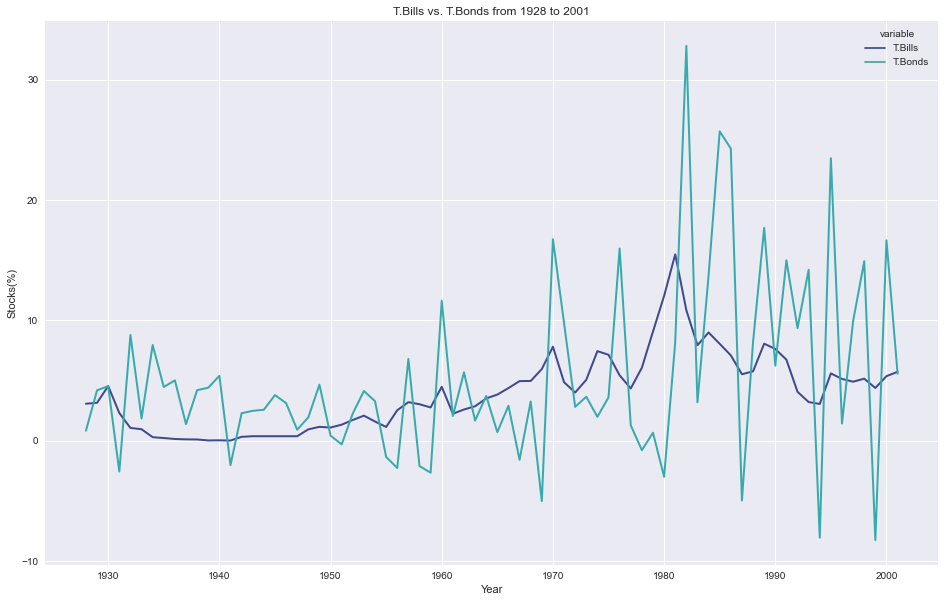

In [148]:
# Line plot T.Bills vs. T.Bonds from 1928 to 2001
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted.reset_index(), x='Year', y='stocks', hue='variable', palette='mako', linewidth= 2.0)
plt.ylabel('Stocks(%)')
plt.title('T.Bills vs. T.Bonds from 1928 to 2001')
plt.show()

In [149]:
# Averages for each
print('Average for T-Bills: ', df_indexed['T.Bills'].mean())
print('Average for T-Bonds: ', df_indexed['T.Bonds'].mean())

Average for T-Bills:  3.960270270270271
Average for T-Bonds:  5.214864864864865
